In [18]:
import workshop_utils.AR4_api as AR4_api
import time
import math
import pickle
from workshop_utils.camera import D435
import numpy as np
import matplotlib.pyplot as plt
from workshop_utils import *

In [19]:
robot = AR4_api.AR4("COM4", cal_path=r'C:\Users\Richard\Desktop\robot\realsense_workshop\robot_move\ARbot.cal')
robot.set_com_gripper("COM3")
robot.open()
myD435 = D435()


Init Start
COMMUNICATIONS STARTED WITH ARDUINO IO BOARD - See log for details
SYSTEM READY
Loaded Calibration Started
self.calibration loading complete


In [129]:
robot.close()

In [130]:
myD435.stop()

In [3]:
robot.cal_robot_all()

Auto Calibration Stage 1 Successful
Auto Calibration Stage 2 Failed - see log for details
J5 CALIBRATION ERROR


In [109]:
robot.cal_robot_joint(1)
robot.cal_robot_joint(2)
robot.cal_robot_joint(3)

J1 Calibrated Successfully
J2 Calibrated Successfully
J3 Calibrated Successfully


In [110]:

robot.cal_robot_joint(4)
robot.cal_robot_joint(5)
robot.cal_robot_joint(6)

J4 Calibrated Successfully
J5 Calibrated Successfully
J6 Calibrated Successfully


In [5]:
robot.cal_robot_joint(5)

J5 Calibrated Successfully


In [64]:
robot2world = robot.request_T()
print(robot2world)

robot.set_tool_offsets(0,0,0.070,0,0,0)
print(robot.request_tool_T())

[[-1.       -0.        0.        0.323078]
 [ 0.        1.        0.000017  0.03054 ]
 [-0.        0.000017 -1.        0.336125]
 [ 0.        0.        0.        1.      ]]
[[-1.       -0.        0.        0.323078]
 [ 0.        1.        0.000017  0.030541]
 [-0.        0.000017 -1.        0.266125]
 [ 0.        0.        0.        1.      ]]


In [15]:

wrist2world = robot.request_T() #wrist2world
temp =  np.matmul(wrist2world,robot.tool2wrist)
print(temp)

[[ 1.93789186e-01  6.55120075e-05  9.81043193e-01  3.91769024e-01]
 [ 3.04403343e-05  9.99999997e-01 -7.27908979e-05  6.90463715e-06]
 [-9.81043195e-01  4.39693716e-05  1.93789183e-01  3.13581243e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [2]:
ax = xyz_zyx_to_se3(0,0,0, 12, 10, 5)
ax

array([[ 0.96328734, -0.19231681,  0.1873279 ,  0.        ],
       [ 0.20475305,  0.97757208, -0.04928508,  0.        ],
       [-0.17364818,  0.08583165,  0.98106026,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [13]:
bx = xyz_zyx_to_se3(281.416*0.001,0,678.963*0.001, 0, 66, 0)

In [7]:
np.set_printoptions(
    precision=6,      # Number of decimals to show
    suppress=True     # Suppress scientific notation
)

print(bx)

[[  0.406737   0.         0.913545 281.416   ]
 [  0.         1.         0.         0.      ]
 [ -0.913545   0.         0.406737 678.963   ]
 [  0.         0.         0.         1.      ]]


In [16]:
x, y, z, Rz, Ry, Rx = se3_to_xyz_rzyx_mm(bx)
print(f"{x} {y} {z} {Rz} {Ry} {Rx}")

281.416 0.0 678.963 0.0 66.0 0.0


In [4]:
x, y, z, Rz, Ry, Rx = se3_to_xyz_rzyx_mm(ax)
print(f"{x} {y} {z} {Rz} {Ry} {Rx}")

0.0 0.0 0.0 11.999999999999998 10.0 5.0


In [33]:
print(robot.request_T())

[[ 0.193789  0.000066  0.981043  0.323096]
 [ 0.00003   1.       -0.000073  0.000012]
 [-0.981043  0.000044  0.193789  0.300016]
 [ 0.        0.        0.        1.      ]]


In [63]:
# robot.move_j(323.08, -0.0, 300, 0.018, -180, 0.018)
robot.move_j(323.08, 30.53, 336.09, 0, 180, 0)
x, y, z, rx, ry ,rz, _, _, _, _ = robot.request_pos()
print(f"{x} {y} {z} {rz} {ry} {rx}")

print(robot.request_T())



x_, y_, z_, rz_, ry_, rx_ = se3_to_xyz_rzyx_mm(robot.request_T())

# rz_ = (rz_ + 180.2) % 360 - 180
# ry_ = (ry_ + 180.2) % 360 - 180
# rx_ = (rx_ + 180.2) % 360 - 180

print(f"{x_} {y_} {z_} {rz_*2} {ry} {rx}")

323.078 30.54 336.125 0.0 180.0 -0.001
[[-1.       -0.        0.        0.323078]
 [ 0.        1.        0.000017  0.03054 ]
 [-0.        0.000017 -1.        0.336125]
 [ 0.        0.        0.        1.      ]]
323.078 30.540000000000003 336.125 360.0 180.0 -0.001


In [36]:
print(xyz_zyx_to_se3(x, y, z, rz, ry, rx))

[[  0.193789   0.000066   0.981043 323.096   ]
 [  0.00003    1.        -0.000073   0.012   ]
 [ -0.981043   0.000044   0.193789 300.016   ]
 [  0.         0.         0.         1.      ]]


In [31]:
print(se3_to_xyz_rzyx(robot.request_T()))

(np.float64(0.323096), np.float64(1.2e-05), np.float64(0.300016), np.float64(0.0001570796326794896), np.float64(1.3757732361770498), np.float64(0.00022689280275926287))


In [29]:
print(robot.request_tool_T())

[[ 0.193789  0.000066  0.981043  0.391769]
 [ 0.00003   1.       -0.000073  0.000007]
 [-0.981043  0.000044  0.193789  0.313581]
 [ 0.        0.        0.        1.      ]]


In [9]:
robot.move_T(wrist2world)

In [14]:
print(wrist2world)

[[ 1.93789186e-01  6.55120075e-05  9.81043193e-01  3.23096000e-01]
 [ 3.04403343e-05  9.99999997e-01 -7.27908979e-05  1.20000000e-05]
 [-9.81043195e-01  4.39693716e-05  1.93789183e-01  3.00016000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [28]:
wrist2world = robot.request_T()
x, y, z, Rz, Ry, Rx = se3_to_xyz_rzyx(wrist2world)

print(f"{x} {y} {z} {Rz} {Ry} {Rx}")

0.323096 1.2e-05 0.300016 0.0001570796326794896 1.3757732361770498 0.00022689280275926287


In [9]:
robot.move_j(323.08, -0.0, 300, 0.018, 180, 0.018)


In [12]:
wrist2world = robot.request_T()


x, y, z, Rz, Ry, Rx = se3_to_xyz_rzyx(wrist2world)

mat = xyz_zyx_to_se3(x, y, z, Rz, Ry, Rx)

In [13]:
wrist2world - mat

array([[-0.76356639, -0.38853006,  0.890449  ,  0.        ],
       [ 0.76791985, -1.4454972 , -0.39724721,  0.        ],
       [ 0.55495344,  0.77231564, -0.78011839,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [17]:

tool2world = mat
wrist2world = np.matmul(tool2world, robot.wrist2tool)
x, y, z, rz, ry, rx, = se3_to_xyz_rzyx_mm(wrist2world)

robot.move_j(x, y, z, rz, ry, rx)

In [ ]:
robot.move_T(robot2world)

In [61]:
robot.move_j_T_tool(robot2world)

In [66]:
def plot_SE3(T, ax=None, length=0.1, colors=('r','g','b'), label=None):
    """
    Plots an SE(3) transformation as a coordinate frame.
    
    Args:
        T: 4x4 numpy array, the SE(3) matrix.
        ax: Matplotlib 3D axis.
        length: Length of the axes.
        colors: Colors for X, Y, Z axes.
        label: Optional label to mark the origin.
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    origin = T[0:3, 3]
    R = T[0:3, 0:3]

    for i in range(3):
        axis = R[:, i]
        ax.quiver(
            origin[0], origin[1], origin[2],
            axis[0], axis[1], axis[2],
            color=colors[i], length=length, normalize=True
        )

    if label is not None:
        ax.text(origin[0], origin[1], origin[2], label, fontsize=10)

    return ax

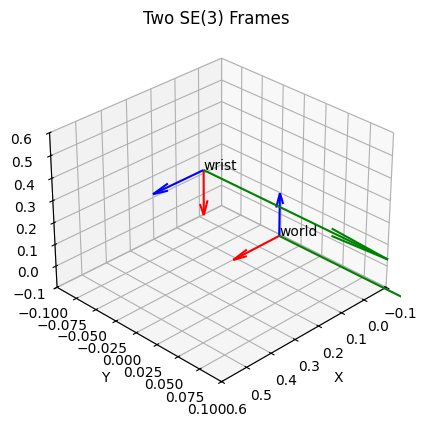

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot both frames
T_world = np.eye(4,4)

plot_SE3(T_world, ax=ax, length=0.2, label='world')
plot_SE3(robot2world, ax=ax, length=0.2, label='wrist')


# Configure axes
ax.set_xlim([-0.1,0.6])
ax.set_ylim([-0.1,0.1])
ax.set_zlim([-0.1,0.6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Two SE(3) Frames')
ax.view_init(elev=30, azim=45)
plt.show()

In [14]:
x, y, z, rz, ry, rx, _, _, _, _ = robot.request_pos()
# returns x,y,z, Rz, Ry, Rx

In [22]:
# input move x,y,x Rx, Ry, Rz

robot.move_j(323.08, 30.53, 336.09, 13.502, 101.89, 10.78 )

In [15]:
robot.grip_mm(30)

In [ ]:
robot.close()

In [9]:
A = robot.request_T()

In [10]:
robot.move_T(A)

Position Out of Reach


In [75]:

robot.move_j(323.08, -0.0, 300, 0.018, 180, 0.018) ## ready positions
time.sleep(1)
robot.move_j(470.08, -0.0, 300, 0.018, 180, 0.018)
time.sleep(1)
robot.move_j(470.08, 150.0, 300, 0.018, 180, 0.018)
time.sleep(1)
robot.move_j(323.08, 150.0, 300, 0.018, 180, 0.018)
time.sleep(1)
robot.move_j(323.08, -0.0, 300, 0.018, 180, 0.018)

In [5]:
robot.cal_robot_all()

Auto Calibration Stage 1 Successful
Auto Calibration Stage 2 Failed - see log for details
J5 CALIBRATION ERROR


In [94]:
c_img = myD435.capture_color()

In [ ]:
robot.set_tcp(0,0,70,0,0,0)

In [116]:
robot.move_j(323.08, -0.0, 400, 0.0, 180, 0.0)

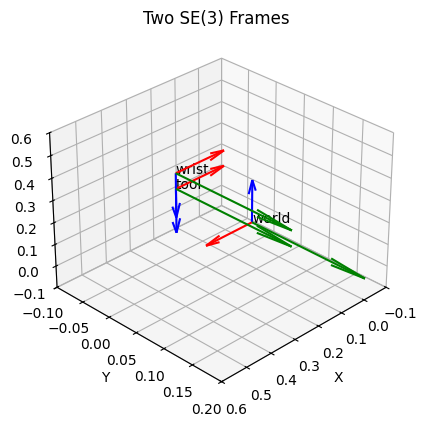

In [117]:
### validate the pose of the robot arm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot both frames
T_world = np.eye(4,4)
wrist2world = robot.request_T()
tool2world = robot.request_tool_T()


plot_SE3(T_world, ax=ax, length=0.2, label='world')
plot_SE3(wrist2world, ax=ax, length=0.2, label='wrist')
plot_SE3(tool2world, ax=ax, length=0.2, label='tool')


# Configure axes
ax.set_xlim([-0.1,0.6])
ax.set_ylim([-0.1,0.2])
ax.set_zlim([-0.1,0.6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Two SE(3) Frames')
ax.view_init(elev=30, azim=45)
plt.show()

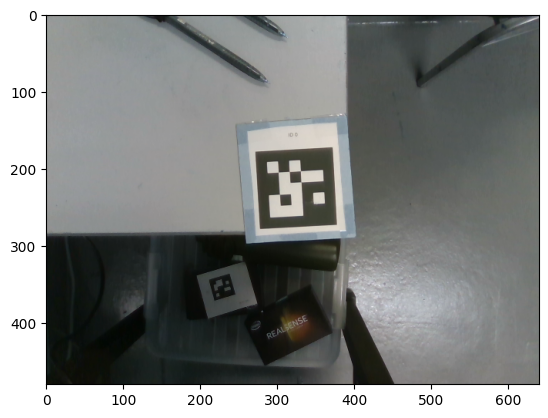

In [118]:
c_img = myD435.capture_color()
plt.imshow(c_img)

In [ ]:
robot_poses = [
    [323.08, -0.0, 300, 0.018, 180, 0.018],
    [350.08, -0.0, 300, 0.018, 200, 0.018],
    [350.08, -80, 300, 20, 180, 0.018],
    [350.08, 80, 300, -20, 180, 0.018],
    [323.08, -0.0, 350, 0.018, 180, 0.018],
    [240.08, -0.0, 350, 0.018, 160, 0.018],
    [290.08, -50, 350, 20, 180, 0.018],
    [250.08, 50, 350, -30, 180, 0.018],
    [280.08, -0.0, 300, 0.018, 180, 0.018],
    [240.08, -0.0, 300, 0.018, 160, 0.018],
    [240.08, -40, 300, 0.018, 160, 15],
    [240.08, 50, 300, 0.018, 160, -15],
]

T_robot2base = []
T_marker2cam = []
imgs = []

poses_offset = []


# for r_pose in robot_poses:


while(True):
    # robot.move_j(r_pose[0], r_pose[1], r_pose[2], r_pose[3], r_pose[4], r_pose[5], )

    bounds_min = np.array([-100, -200, -100, -45, 0, -45])
    bounds_max = np.array([200, 200, 100, 45, 0, 45])

    offset = np.random.uniform(bounds_min, bounds_max)

    robot.move_j(323.08 + offset[0], -0.0 + offset[1], 300 + offset[2], 0.018 + offset[3], 180 + offset[4], 0.018 + offset[5])
    time.sleep(1)
    
    res, img = myD435.detect_aruco_T(marker_size=0.067)

    if 0 in res.keys():
        
        T_robot2base.append(robot.request_T())
        T_marker2cam.append(res[0])
        poses_offset.append(offset)
        # imgs.append(img)
        count = len(T_robot2base)
        print(f"Progress {count}")
    

    ## get the Transform of the Marker1
    if len(T_robot2base)> 30:
        print("calibration_completed")
        break
    



Progress 1
Progress 2
Progress 3
Progress 4
Progress 5
Progress 6
Progress 7
Progress 8
Progress 9
Progress 10
Position Out of Reach
Progress 11
Progress 12
Progress 13
Progress 14
Progress 15
Progress 16
Progress 17
Position Out of Reach
Progress 18
Progress 19
Progress 20
Progress 21
Progress 22
Progress 23
Progress 24
Progress 25
Progress 26
Progress 27
Progress 28
Progress 29
Progress 30
Progress 31
calibration_completed


In [ ]:
import numpy as np

In [ ]:
bounds_min = np.array([-100, -200, -100, -45, -20, -45])
bounds_max = np.array([200, 200, 100, 45, 20, 45])

np.random.uniform(bounds_min, bounds_max)

array([-84.93931788, -33.79141271, -18.49752487, -31.11520341,
         0.        , -15.26961881])

In [ ]:
print(poses_offset)

In [70]:
saved_offsets = [np.array([ 90.10117312, 170.9886176 , -54.54188812, -43.28501112,
         0.        ,   3.80410973]), np.array([-17.86358497, -41.40859238,  69.81741084,  31.86848732,
         0.        ,   1.47251082]), np.array([  65.92425286, -129.96367922,  -17.78701084,   22.9887841 ,
          0.        ,   39.61263701]), np.array([ 122.62804331, -118.28098257,   40.52765136,   40.74528703,
          0.        ,   32.00686974]), np.array([118.89653479,  44.83899985,  77.72094594, -25.03463313,
         0.        ,  29.60594039]), np.array([45.47300455, 49.06257225, 92.97620781, 16.16098317,  0.        ,
       13.12586056]), np.array([116.66827252, 111.41255749,  -4.85753521, -42.65095396,
         0.        , -30.59024688]), np.array([  12.76729347, -188.53218235,   38.89661872,   40.53079798,
          0.        ,  -40.45472015]), np.array([ 94.41143011,   0.24830322,  50.24580616, -28.50372118,
         0.        , -44.54722418]), np.array([-45.48297156,  50.52693141, -18.94765681,  -4.91689603,
         0.        , -24.7547058 ]), np.array([ 141.23794624, -109.55242459,   51.91554027,   40.50146172,
          0.        ,  -31.8915595 ]), np.array([ 28.25845214, -17.37127384,  66.62384213,   1.64498045,
         0.        ,  -0.26034797]), np.array([ 31.61119093, -79.25244139,  13.80077423,  -1.3230344 ,
         0.        ,  19.60548198]), np.array([ 51.61315245, -55.07902302, -77.24967661,  19.79165133,
         0.        , -17.39041856]), np.array([ 84.17162379, -73.45351582, -17.52569646,  28.20163648,
         0.        , -26.14750638]), np.array([   4.0037763 , -128.94864935,  -33.03422478,   19.42173069,
          0.        ,  -29.50752307]), np.array([ 90.96763827, -47.94983145,  45.34359079,  30.39596342,
         0.        ,  21.92132972]), np.array([  8.53628924,  44.58317931,  98.67281897, -32.87590227,
         0.        ,   2.65845612]), np.array([ 43.21502413, -81.49750151, -75.25991354,  18.26114484,
         0.        , -16.44086196]), np.array([-88.58208203, -79.53472112,  70.98912025,  -9.27092911,
         0.        , -14.69705024]), np.array([125.54220953, -42.09722747,  18.86029726,  25.7399993 ,
         0.        ,  40.84549951]), np.array([ -26.65555215, -131.34343926,   80.77350276,   22.07462529,
          0.        ,   18.20473078]), np.array([ 64.42569545, 123.12652194,  49.2207941 , -37.41844521,
         0.        , -29.47080041]), np.array([117.29758813, 142.47060849, -31.83642126, -42.17155376,
         0.        , -30.11989153]), np.array([  43.06447787, -153.95317326,  -14.97463038,   31.46331249,
          0.        ,   44.59890206]), np.array([ 107.79722073, -196.2449655 ,   29.96146084,   36.50784206,
          0.        ,   32.90091781]), np.array([ 17.84375607,  36.79601386,  80.08606588, -28.13535834,
         0.        ,  -0.21495494]), np.array([  9.28271868,   5.50582698,  26.29451828, -33.94227817,
         0.        ,  25.47244806]), np.array([-48.05161248, -46.52947997,  74.64308455,   8.76283957,
         0.        ,  32.95778707]), np.array([  68.20268195, -153.36993705,   70.93562922,   18.49617017,
          0.        ,   10.42225449]), np.array([-29.88067086, -93.37869906,  90.85494462,   8.43104162,
         0.        , -24.95733218])]


In [72]:
## calibration vt
T_robot2base = []
T_marker2cam = []
imgs = []

poses_offset = []


# for r_pose in robot_poses:


for offset in saved_offsets:
    # robot.move_j(r_pose[0], r_pose[1], r_pose[2], r_pose[3], r_pose[4], r_pose[5], )

    # bounds_min = np.array([-100, -200, -100, -45, 0, -45])
    # bounds_max = np.array([200, 200, 100, 45, 0, 45])

    # offset = np.random.uniform(bounds_min, bounds_max)

    robot.move_j(323.08 + offset[0], -0.0 + offset[1], 300 + offset[2], 0.000 + offset[3], 180 + offset[4], 0.000 + offset[5])
    time.sleep(1)
    
    res, img = myD435.detect_aruco_T(marker_size=0.067)

    if 0 in res.keys():
        
        T_robot2base.append(robot.request_T())
        T_marker2cam.append(res[0])
        poses_offset.append(offset)
        # imgs.append(img)
        count = len(T_robot2base)
        print(f"Progress {count}")
    

    ## get the Transform of the Marker1
print("Calibration Completed")

Progress 1
Progress 2
Progress 3
Progress 4
Progress 5
Progress 6
Progress 7
Progress 8
Progress 9
Progress 10
Progress 11
Progress 12
Progress 13
Progress 14
Progress 15
Progress 16
Progress 17
Progress 18
Calibration Completed


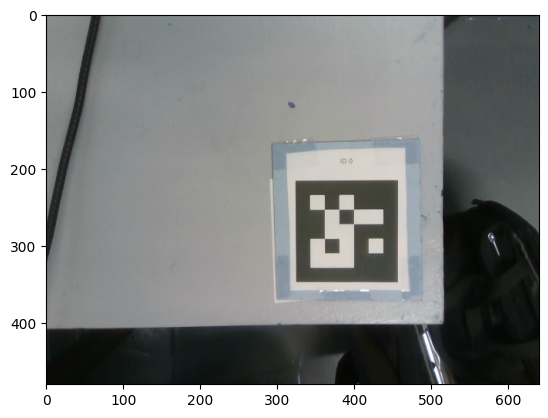

In [27]:
T_marker2cam[0]['T']

array([[ 0.99960712,  0.00924943, -0.02645853,  0.01244391],
       [ 0.00769408, -0.99826982, -0.05829385,  0.05235614],
       [-0.02695194,  0.05806738, -0.99794878,  0.31650686],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [112]:
result, img = myD435.detect_aruco_T()

In [73]:
## perform extrinsic eye on hand calibration

## parse
T_robot2base ## aka gripper to base

TR_robot2base = []
TT_robot2base = []

for Temp in T_robot2base:
    T_mat = Temp
    TR_robot2base.append(T_mat[:3,:3])
    TT_robot2base.append(T_mat[:3,3]) ## conv to meters

TR_marker2cam = []
TT_marker2cam = []


for T_mat in T_marker2cam:
    TR_marker2cam.append(T_mat['T'][:3,:3])
    TT_marker2cam.append(T_mat['T'][:3,3])   ## in meters

In [74]:
import cv2

R_res, T_res = cv2.calibrateHandEye(TR_robot2base, TT_robot2base, TR_marker2cam, TT_marker2cam)

In [75]:
R_res

array([[ 0.049489,  0.996876, -0.061551],
       [-0.998604,  0.050524,  0.015387],
       [ 0.018449,  0.060704,  0.997985]])

In [76]:
R_res

array([[ 0.049489,  0.996876, -0.061551],
       [-0.998604,  0.050524,  0.015387],
       [ 0.018449,  0.060704,  0.997985]])

In [18]:
T_res

array([[-0.01804412],
       [ 0.01041418],
       [-0.00190484]])

In [77]:
import numpy as np
cam2gripper = np.eye(4,4)
cam2gripper[:3, :3] =  R_res
cam2gripper[:3,3] = T_res.T

In [78]:
print(cam2gripper)

[[ 0.049489  0.996876 -0.061551 -0.000368]
 [-0.998604  0.050524  0.015387  0.015306]
 [ 0.018449  0.060704  0.997985 -0.0193  ]
 [ 0.        0.        0.        1.      ]]


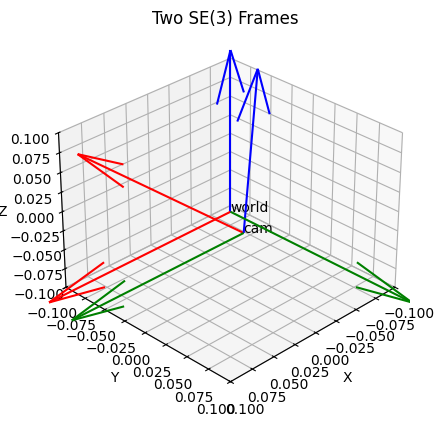

In [80]:
import matplotlib.pyplot as plt

def plot_SE3(T, ax=None, length=0.1, colors=('r','g','b'), label=None):
    """
    Plots an SE(3) transformation as a coordinate frame.
    
    Args:
        T: 4x4 numpy array, the SE(3) matrix.
        ax: Matplotlib 3D axis.
        length: Length of the axes.
        colors: Colors for X, Y, Z axes.
        label: Optional label to mark the origin.
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    origin = T[0:3, 3]
    R = T[0:3, 0:3]

    for i in range(3):
        axis = R[:, i]
        ax.quiver(
            origin[0], origin[1], origin[2],
            axis[0], axis[1], axis[2],
            color=colors[i], length=length, normalize=True
        )

    if label is not None:
        ax.text(origin[0], origin[1], origin[2], label, fontsize=10)

    return ax


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot both frames
T_world = np.eye(4,4)

plot_SE3(T_world, ax=ax, length=0.2, label='world')
plot_SE3(cam2gripper, ax=ax, length=0.2, label='cam')


# print(res[0]['T'])
# print(cam2gripper)

# Configure axes
ax.set_xlim([-0.1,0.1])
ax.set_ylim([-0.1,0.1])
ax.set_zlim([-0.1,0.1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Two SE(3) Frames')
ax.view_init(elev=30, azim=45)
plt.show()

In [81]:
T_marker2cam[0]['T']

array([[ 0.937309, -0.342888,  0.06229 , -0.07835 ],
       [-0.348019, -0.930326,  0.115657, -0.027337],
       [ 0.018293, -0.130084, -0.991334,  0.382319],
       [ 0.      ,  0.      ,  0.      ,  1.      ]])

In [ ]:
TT_marker2cam

[array([0.058168  , 0.03949304, 0.31673799]),
 array([ 0.06017557, -0.04258382,  0.29721049]),
 array([0.06360997, 0.03909914, 0.31680676]),
 array([0.05696515, 0.04000286, 0.33192347]),
 array([0.06051578, 0.0391402 , 0.36915761]),
 array([0.0590305 , 0.11475054, 0.35992571]),
 array([0.09530152, 0.00277882, 0.35960026]),
 array([-0.01757919, -0.03904649,  0.37409752])]

In [83]:
robot.move_j(323.08, -0.0, 300, 0.000, 180, 0.000)

[[-1.        0.        0.        0.323096]
 [ 0.        1.        0.       -0.      ]
 [-0.        0.       -1.        0.300016]
 [ 0.        0.        0.        1.      ]]


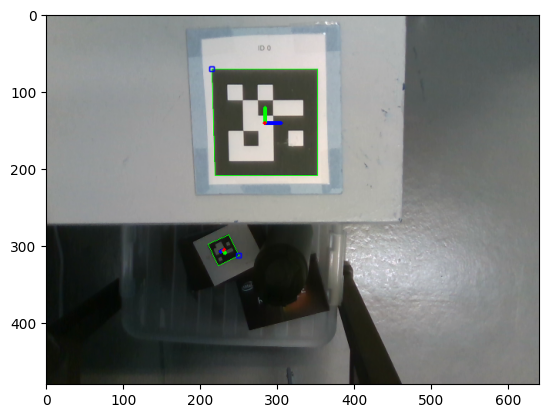

In [84]:
# robot.move_j(323.08, -0.0, 300, 0.018, 180, 0.018)
res, img = myD435.detect_aruco_T(marker_size=0.067) # in meters
gripper2world = robot.request_T()
print(gripper2world)
plt.imshow(img)

In [85]:
print(res[0]['T'])
print(cam2gripper)

[[ 0.999783 -0.002615 -0.020656 -0.018249]
 [ 0.00062  -0.987904  0.155063 -0.049514]
 [-0.020812 -0.155042 -0.987689  0.304876]
 [ 0.        0.        0.        1.      ]]
[[ 0.049489  0.996876 -0.061551 -0.000368]
 [-0.998604  0.050524  0.015387  0.015306]
 [ 0.018449  0.060704  0.997985 -0.0193  ]
 [ 0.        0.        0.        1.      ]]


In [23]:
def se3_to_xyz_rzyx(T): ## in mm
    """
    Converts SE(3) matrix to (x, y, z, Rz, Ry, Rx) in radians.
    
    Returns:
        tuple: (x, y, z, Rz, Ry, Rx)
    """
    R = T[0:3,0:3]
    p = T[0:3,3]

    # Compute Euler angles ZYX
    sy = -R[2,0]
    beta = np.arcsin(sy)
    cos_beta = np.cos(beta)

    if abs(cos_beta) > 1e-6:
        alpha = np.arctan2(R[2,1]/cos_beta, R[2,2]/cos_beta)
        gamma = np.arctan2(R[1,0]/cos_beta, R[0,0]/cos_beta)
    else:
        # Gimbal lock
        alpha = 0
        gamma = np.arctan2(-R[0,1], R[1,1])

    return (p[0], p[1], p[2], gamma*180/math.pi, beta*180/math.pi, alpha*180/math.pi) ## convert to mm and deg

In [125]:
robot.move_j(323.08, -0.0, 400, 0.0, 180.00, 0.00)
res, img = myD435.detect_aruco_T(marker_size=0.067) # in meters
gripper2world = robot.request_T()

marker2cam = res[0]['T']

cam2world  = np.matmul(gripper2world, cam2gripper)
marker2world = np.matmul(cam2world,marker2cam)

# marker2gripper = np.matmul(cam2gripper,marker2cam)
# marker2world = np.matmul(gripper2world, marker2gripper)

x, y, z, Rz, Ry, Rx = se3_to_xyz_rzyx_mm(marker2world)
print(f"X:{x}mm Y:{y}mm Z:{z}mm\nRZ:{Rz} RY:{Ry} RX:{Rx}")

X:357.1749969432586mm Y:18.693687362996897mm Z:9.94489942021648mm
RZ:-89.99553337076935 RY:-2.027571682953184 RX:7.064532523035347


In [123]:
robot.move_j(x, y, z+50, 0, 180, 0)

In [92]:
offset = np.zeros((4,4))
offset[2,3] = 0.030
print(offset)

[[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.03]
 [0.   0.   0.   0.  ]]


In [93]:
robot.move_j_T_tool(marker2world + offset)

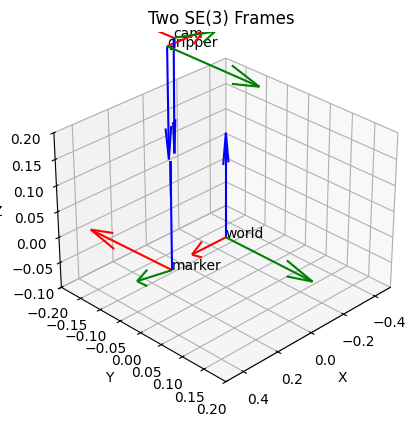

In [124]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot both frames
T_world = np.eye(4,4)

plot_SE3(T_world, ax=ax, length=0.2, label='world')
# plot_SE3(cam2gripper, ax=ax, length=0.2, label='cam')
# plot_SE3(res[0]['T'], ax=ax, length=0.2, label='marker')

plot_SE3(cam2world, ax=ax, length=0.2, label='cam')
# plot_SE3(cam2world, ax=ax, length=0.2, label='arm_cam')
plot_SE3(gripper2world, ax=ax, length=0.2, label='gripper')
plot_SE3(marker2world, ax=ax, length=0.2, label='marker')

# Configure axes
ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.2,0.2])
ax.set_zlim([-0.1,0.2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Two SE(3) Frames')
ax.view_init(elev=30, azim=45)
plt.show()

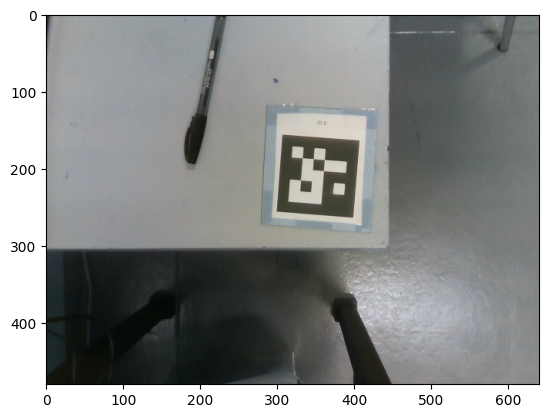

In [57]:
## perform a move to aruco marker X with the end effector

result = myD435.capture()
# home

plt.imshow(result["color"])
# ready position


# take a picture



## locate the markers and their position to the camera


## apply the transfromation from Marker to Cam, Cam to Gripper, Gripper to world



## get a request to go to number X


## move the gripper to the marker but with 30 mm z offset



## move to another marker


[[ 0.00589782  0.00589782  0.00589782 ... -0.69210221 -0.69210221
  -0.69210221]
 [ 0.00589782  0.00589782  0.00589782 ... -0.69210221 -0.69210221
  -0.69210221]
 [ 0.00589782  0.00489782  0.00489782 ... -0.69210221 -0.69210221
  -0.69210221]
 ...
 [-0.22310219 -0.22310219 -0.22310219 ... -0.72210221 -0.72210221
  -0.72210221]
 [-0.22310219 -0.22310219 -0.22310219 ... -0.72210221 -0.72210221
  -0.72210221]
 [-0.22010219 -0.22010219 -0.21910219 ... -0.72210221 -0.72210221
  -0.72210221]]


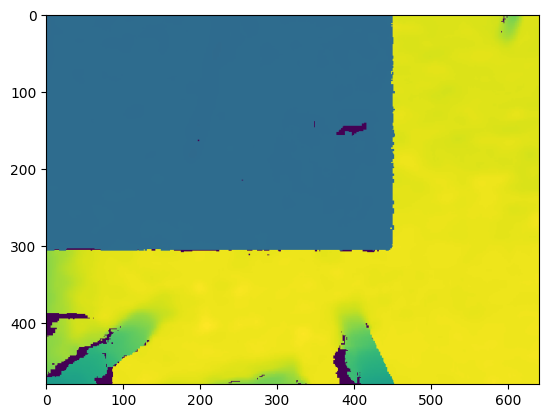

In [58]:
plt.imshow(result["depth_image"])

depth_map = result["depth_image"]*myD435.get_depth_scale()


gripper2world = robot.request_T()
marker2cam = res[0]['T']
cam2world  = np.matmul(gripper2world, cam2gripper)
camera_h = cam2world[2][3]

depth_map_adj = camera_h - depth_map
print(depth_map_adj)

In [53]:
cam2world

array([[-0.05379023, -0.99617309,  0.06888959,  0.34112112],
       [-0.99710526,  0.05729701,  0.04998162,  0.01041418],
       [-0.05373751, -0.06600165, -0.99637145,  0.40189784],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [60]:
mask_depth = (depth_map_adj > -0.4) & (depth_map_adj < 0.0)

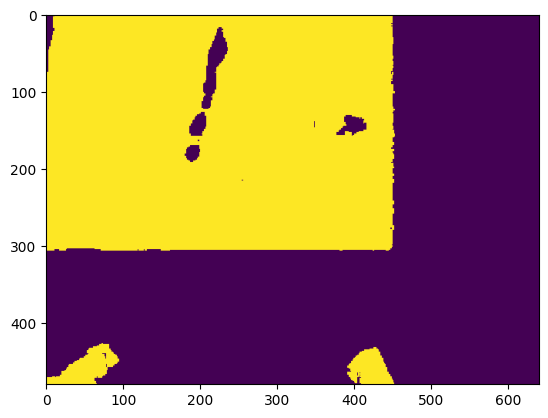

In [61]:
plt.imshow(mask_depth)

In [ ]:
import open3d as o3d

result = myD435.capture()

depth_image = result["depth_image"]*myD435.get_depth_scale()
color_image = result["color"]
points = result["points"]

near_mask = (depth_image > 0.2) & (depth_image < 1.2)


        # ---- 4. Create Point Cloud --
idxs = np.argwhere(near_mask)


pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

        # ---- 5. RANSAC Plane Segmentation ----
plane_model, inliers = pcd.segment_plane(distance_threshold=0.005,
                                                 ransac_n=3,
                                                 num_iterations=500)
[a,b,c,d] = plane_model
print("Plane: {:.3f}x + {:.3f}y + {:.3f}z + {:.3f}".format(a,b,c,d))

# ---- 6. Mask table points ----
inlier_points = np.asarray(pcd.points)[inliers]
table_mask_2d = np.zeros(depth_image.shape, dtype=np.uint8)
for p in inlier_points:
    u_proj = int((p[0]*fx/p[2]) + cx)
    v_proj = int((p[1]*fy/p[2]) + cy)

    if 0<=u_proj<depth_image.shape[1] and 0<=v_proj<depth_image.shape[0]:
                table_mask_2d[v_proj,u_proj] = 255

        # ---- 7. Foreground Mask ----
        foreground_mask = cv2.bitwise_and(near_mask.astype(np.uint8)*255,
                                          cv2.bitwise_not(table_mask_2d))
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
        foreground_mask = cv2.morphologyEx(foreground_mask, cv2.MORPH_OPEN, kernel)

        # ---- 8. Contour Detection ----
        contours, _ = cv2.findContours(foreground_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        output_image = color_image.copy()
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area < 200:
                continue
            rect = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(output_image, [box], 0, (0,255,0), 2)
            cv2.putText(output_image, "Candidate", (box[0][0], box[0][1]-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

        # ---- 9. Show Results ----
        cv2.imshow('RGB', color_image)
        cv2.imshow('Foreground Mask', foreground_mask)
        cv2.imshow('Detected Objects', output_image)

In [ ]:
cv2.destroyAllWindows()

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]], shape=(480, 640))

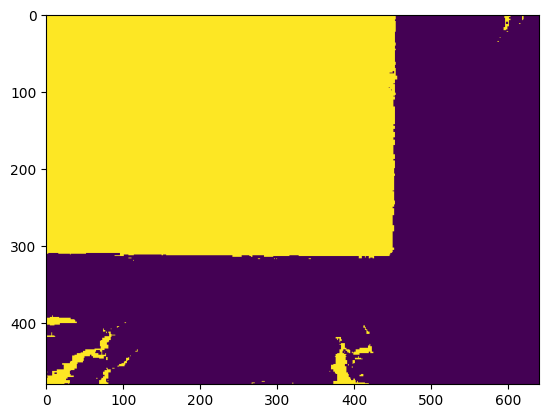

In [47]:
mask = depth_map < 0.45

plt.imshow(mask)
mask

In [62]:
verts = result["verts"]

In [64]:
verts[0][0]

array([-0.20613936, -0.1548475 ,  0.39600003], dtype=float32)

In [ ]:
import open3d as o3d



# Start streaming

depth_intrinsics = myD435.depth_intrinsics

fx, fy = depth_intrinsics.fx, depth_intrinsics.fy
cx, cy = depth_intrinsics.ppx, depth_intrinsics.ppy

print("Intrinsics:", fx, fy, cx, cy)

try:
    while True:
        # ---- 2. Get frames ----
        res = myD435.capture()
        color_frame = res["color"]
        depth_frame = res["depth_image"]

        if depth_frame.any() or color_frame.any():
            continue

        # Convert images to numpy arrays
        depth_image = np.asanyarray(depth_frame.get_data()).astype(np.float32) * myD435.depth_scale  # meters
        color_image = np.asanyarray(color_frame.get_data())

        # ---- 3. Near Mask ----
        near_mask = (depth_image > 0.2) & (depth_image < 1.2)

        # ---- 4. Create Point Cloud ----
        idxs = np.argwhere(near_mask)
        if idxs.size == 0:
            continue

        z = depth_image[idxs[:,0], idxs[:,1]]
        u = idxs[:,1]
        v = idxs[:,0]
        x = (u - cx) * z / fx
        y = (v - cy) * z / fy

        points = np.stack((x,y,z), axis=1)
        colors = color_image[v,u]/255.0

        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(points)
        pcd.colors = o3d.utility.Vector3dVector(colors)

        # ---- 5. RANSAC Plane Segmentation ----
        plane_model, inliers = pcd.segment_plane(distance_threshold=0.005,
                                                 ransac_n=3,
                                                 num_iterations=500)
        [a,b,c,d] = plane_model
        print("Plane: {:.3f}x + {:.3f}y + {:.3f}z + {:.3f}".format(a,b,c,d))

        # ---- 6. Mask table points ----
        inlier_points = np.asarray(pcd.points)[inliers]
        table_mask_2d = np.zeros(depth_image.shape, dtype=np.uint8)
        for p in inlier_points:
            u_proj = int((p[0]*fx/p[2]) + cx)
            v_proj = int((p[1]*fy/p[2]) + cy)
            if 0<=u_proj<depth_image.shape[1] and 0<=v_proj<depth_image.shape[0]:
                table_mask_2d[v_proj,u_proj] = 255

        # ---- 7. Foreground Mask ----
        foreground_mask = cv2.bitwise_and(near_mask.astype(np.uint8)*255,
                                          cv2.bitwise_not(table_mask_2d))
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
        foreground_mask = cv2.morphologyEx(foreground_mask, cv2.MORPH_OPEN, kernel)

        # ---- 8. Contour Detection ----
        contours, _ = cv2.findContours(foreground_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        output_image = color_image.copy()
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area < 200:
                continue
            rect = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(output_image, [box], 0, (0,255,0), 2)
            cv2.putText(output_image, "Candidate", (box[0][0], box[0][1]-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

        # ---- 9. Show Results ----
        cv2.imshow('RGB', color_image)
        cv2.imshow('Foreground Mask', foreground_mask)
        cv2.imshow('Detected Objects', output_image)

        key = cv2.waitKey(1)
        if key == 27:  # ESC to quit
            break

finally:
    cv2.destroyAllWindows()
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Intrinsics: 617.2272338867188 617.47802734375 321.3000183105469 241.4518280029297


KeyboardInterrupt: 

In [ ]:
### min area rect


## learn how to perform the orientation

In [ ]:
## perform a pick sequence

In [ ]:
## perform a pick sequence where place is controlled by a marker